# INTRODUCTION

**Objective of this project is to predict what sorts of people where likely to survive the Titanic Shipwreck. The data has been collected from kaggle and following is the dataset overview.
This is my first attempt at machine learning!

> DATASET OVERVIEW

1. survival-(Survival of the person)--0(no) 1(yes)
2. pclass-(ticket class/proxy for socio economic status)--1(Upper) 2(middle) 3(lower)
3. sex-(gender)--male female
4. age-(age in years)
5. sibsp-(no of siblings or spouses on board)
6. parch-(no of parents or childen on board)
7. ticket-(ticket number)
8. fare-(passenger fare)
9. cabin-(cabin number)
10. embarked-(port of embarkation)--C(Cherbourg) Q(Queenstown) S(SouthHampton)
11. PassengerId(Pasenger Id)
12. Name(name of passenger)

# IMPORTING LIBRARY

In [74]:
import numpy as np 
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt

# Getting dataset

In [75]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")
#This displays first 5 data from the training-dataset
train_data.head()
#observation: the dataset consists of categorical variable and a few numerical variables.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
train_data.tail()
#displaying bottom 5 data from the training-dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# EXPLORE/VISUALIZE DATASET

In [77]:
#Finding dimensions
print("number of rows in traning set",train_data.shape[0])
print("number of columns in training set",train_data.shape[1])
print("number of rows in test set",test_data.shape[0])
print("number of columns in test set",test_data.shape[1])

number of rows in traning set 891
number of columns in training set 12
number of rows in test set 418
number of columns in test set 11


In [78]:
train_data.isna().sum()
#Here Age,Cabin and Embarked have missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [79]:
test_data.isna().sum()
#here Age,Fare,Cabin have missing values

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Data preprocessing i.e dealing with missing values

TRAINING SET
>In training set we have missing values in Age,Cabin,Embarked with Age having the maximum number of missing values out of all.
Since age has a lot of missing values we will replace it by avg age grouped by PClass instead of avg age of the whole dataset.
A reason for finding mean grouped by PClass is that it is most related to Age which can be seen from the heat map below.

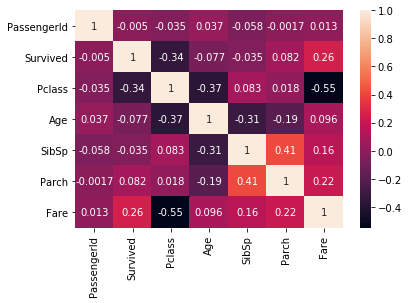

In [80]:
sns.heatmap(train_data.corr(),annot=True)
#Age is correlated to PCLASS the most.

In [81]:
df=train_data.groupby('Pclass',as_index=False)['Age'].mean()
df.head()

,Pclass,Age
0,1,38.233441
1,2,29.877630
2,3,25.140620


In [82]:
#Replacing missing vales in training set
#AGE
for i,row in train_data.iterrows():
    if(np.isnan(train_data['Age'][i])==True):
        if(train_data['Pclass'][i]==1):
            train_data['Age'][i]=38.0
        elif(train_data['Pclass'][i]==2):
            train_data['Age'][i]=30.0
        else:
            train_data['Age'][i]=25.0
#CABIN (It has maximum number of missing values and hence it will NOT be worth a feature to work on. Still we will replace
#the missing values with its mode)
train_data['Cabin']=train_data['Cabin'].fillna(train_data['Cabin'].mode()[0])
#EMBARKED
#For this we have two missing values each having equivalent Fare of $80 and same PClass,same ticketnumber this
#means that they had to board from the same station.And on google search, I got to know that she boarded from SouthHampton.
#This means that Both of them boarded from SouthHampton.
train_data['Embarked']=train_data['Embarked'].fillna('S')

C:\Users\RADHA JAYARAMAN\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\RADHA JAYARAMAN\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\RADHA JAYARAMAN\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [83]:
train_data.info()
#no missing values in training set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


TEST SET
>In test set we have missing values in Age,Cabin,Fare with Age having the maximum number of missing values out of all.
Since age has a lot of missing values we will replace it by median age grouped by PClass instead of avg age of the whole dataset.
As age is right-skewed so it will be better to replace it with median values

In [1]:
df=test_data.groupby('Pclass',as_index=False)['Age'].median()
df.head()

NameError: name 'test_data' is not defined

In [85]:
#Replacing Missing Values in Test Set
#AGE
for i,row in test_data.iterrows():
    if(np.isnan(test_data['Age'][i])==True):
        if(test_data['Pclass'][i]==1):
            test_data['Age'][i]=41.0
        elif(test_data['Pclass'][i]==2):
            test_data['Age'][i]=28.0
        else:
            test_data['Age'][i]=24.0
#CABIN
test_data['Cabin']=test_data['Cabin'].fillna(test_data['Cabin'].mode()[0])
#FARE
#We can see that Fare is most correlated to Pclass and hence it should be computed by median of fare grouped by pclass.
#As the person belonged to class 3, we will take mean of class 3.

C:\Users\RADHA JAYARAMAN\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\RADHA JAYARAMAN\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\RADHA JAYARAMAN\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [86]:
df=test_data.groupby('Pclass',as_index=False)['Fare'].median()
df.head()

,Pclass,Fare
0,1,60.0000
1,2,15.7500
2,3,7.8958


In [87]:
test_data['Fare']=test_data['Fare'].fillna(7.89)
test_data.isna().sum()
#NO MISSING VALUES

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# DATA VISUALIZATION

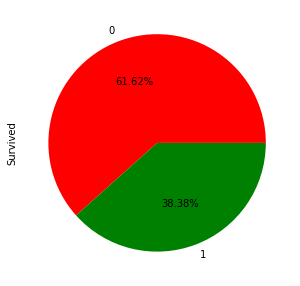

In [88]:
train_data['Survived'].value_counts().plot.pie(autopct='%0.2f%%',colors=['red','green'],figsize=(5,5))

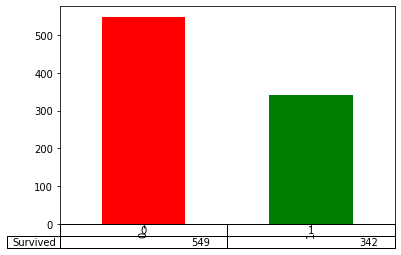

In [89]:
train_data.Survived.value_counts().plot(kind='bar',color=['red','green'],table=True)

>This shows that 549 people died and 342 people survived the Titanic Shipwreck. 

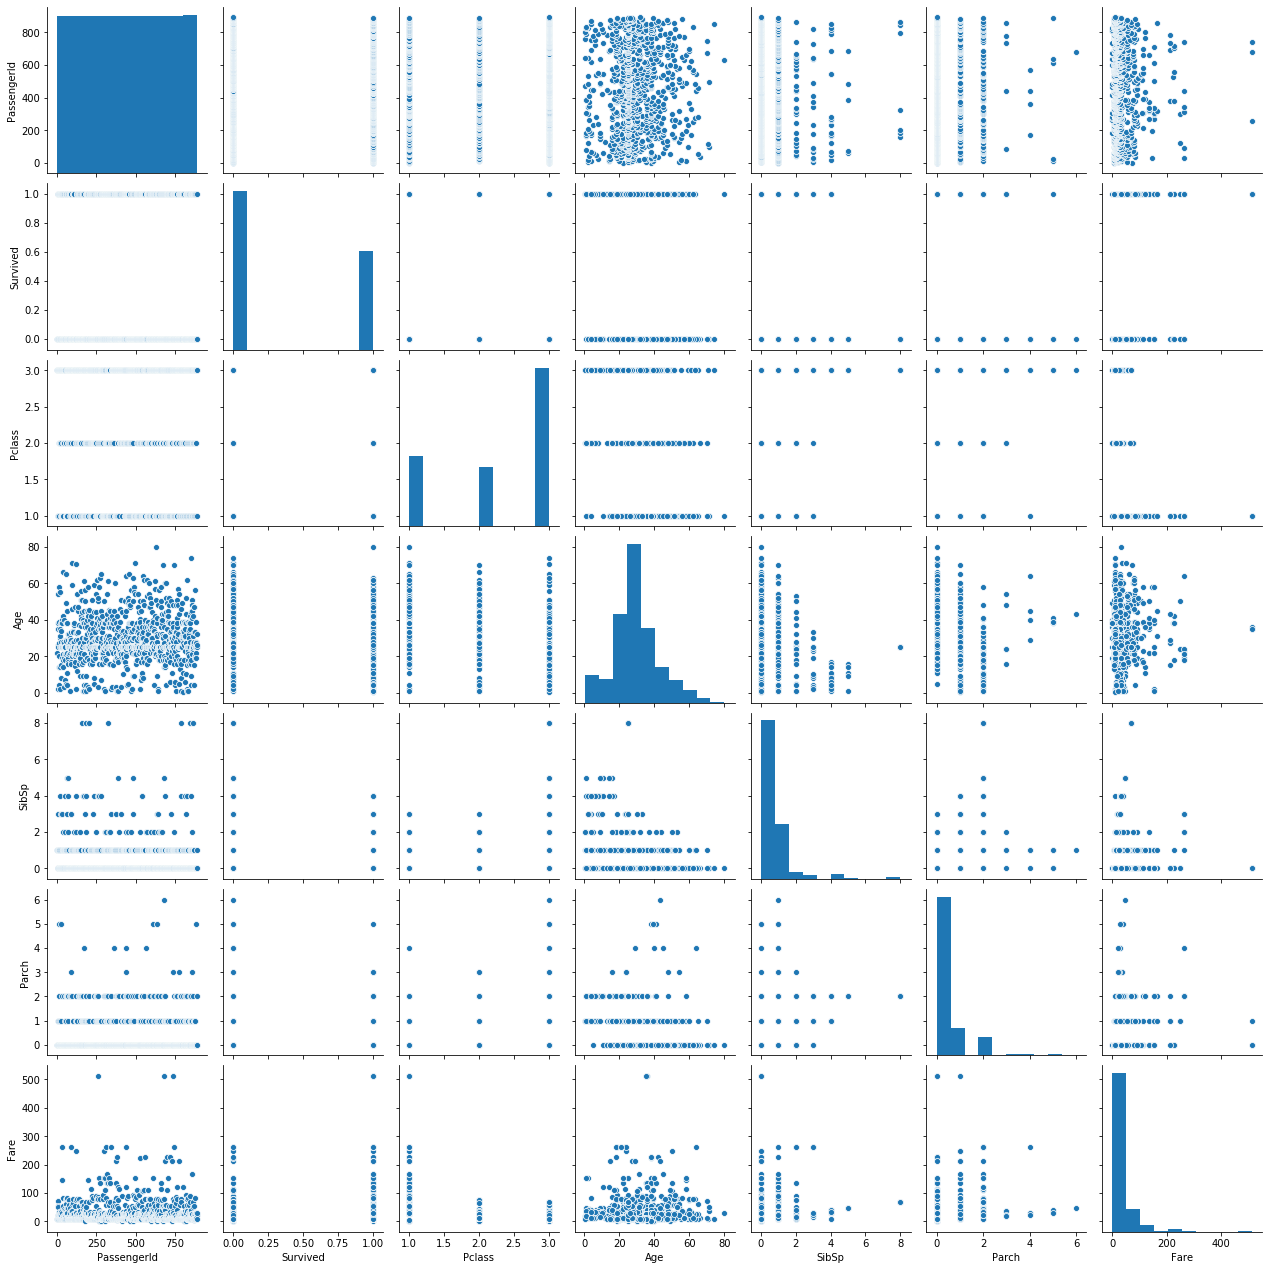

In [97]:
sns.pairplot(train_data)

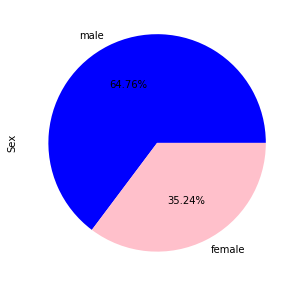

In [98]:
train_data['Sex'].value_counts().plot.pie(autopct='%0.2f%%',figsize=(5,5),colors=['blue','pink'])

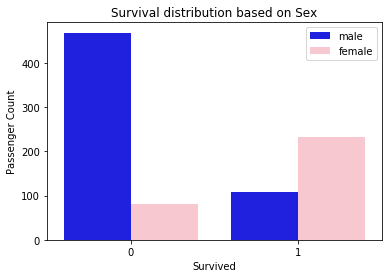

In [105]:
sns.countplot(x = 'Survived',data = train_data,hue = 'Sex',palette=['blue','pink'])
plt.xlabel('Survived')
plt.ylabel('Passenger Count')
plt.title('Survival distribution based on Sex')
plt.legend()

> This shows gender proved to be one of a predictor of Survival. This can also be thought of in a way that when danger strikes men usually try getting all the women around to safety. Also, on reading about the titanic, I found that there was a protocol called 'women and children' first for loading of lifeboats that could have been a major cause of disproportionate number of men onboard.

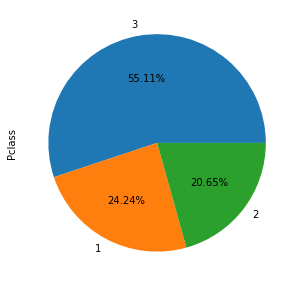

In [100]:
train_data['Pclass'].value_counts().plot.pie(autopct='%0.2f%%',figsize=(5,5))

>Almost half of the population on Titanic was from the lower class(Class 3).

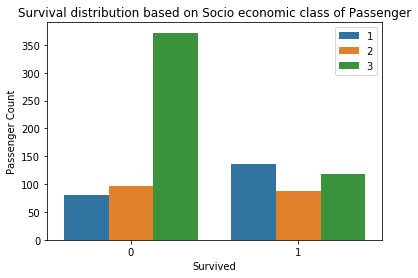

In [107]:
sns.countplot(x = 'Survived',data = train_data,hue = 'Pclass')
plt.xlabel('Survived')
plt.ylabel('Passenger Count')
plt.title('Survival distribution based on Socio economic class of Passenger')
plt.legend()

>It can be seen that almost equal amount of people survived in all three categories. Because of majority of lower class people, they couldnt be attended and hence many people of lower category died due to chaos etc.Pclass slightly varies in the Survival category and hence can be a good feature to work on.

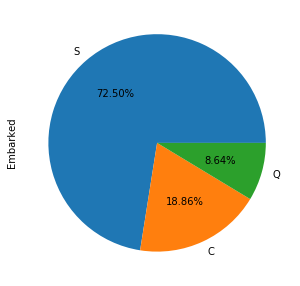

In [102]:
train_data['Embarked'].value_counts().plot.pie(autopct='%0.2f%%',figsize=(5,5))

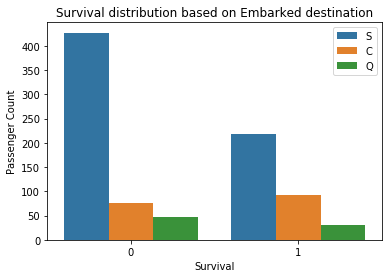

In [109]:
sns.countplot(x = 'Survived',data = train_data,hue = 'Embarked')
plt.xlabel('Survival')
plt.ylabel('Passenger Count')
plt.title('Survival distribution based on Embarked destination')
plt.legend()

> There seem to be a good variation in survival with the Embarked Destination. Hence a good feature.

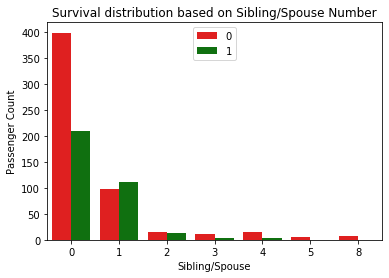

In [110]:
sns.countplot(x = 'SibSp',data = train_data,hue = 'Survived',palette=['red','green'])
plt.xlabel('Sibling/Spouse')
plt.ylabel('Passenger Count')
plt.title('Survival distribution based on Sibling/Spouse Number')
plt.legend()

>We can see that Survival rate decreases with increase in number of Sibling/Spouse with the Passenger. And hence this can also be used as a Predictor.

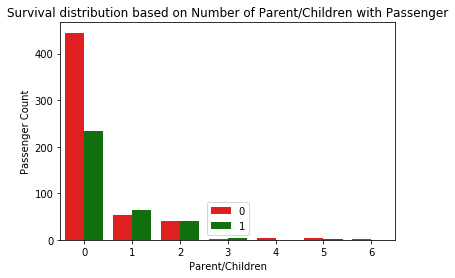

In [111]:
sns.countplot(x = 'Parch',data = train_data,hue = 'Survived',palette=['red','green'])
plt.xlabel('Parent/Children')
plt.ylabel('Passenger Count')
plt.title('Survival distribution based on Number of Parent/Children with Passenger')
plt.legend()

We can see that Survival rate decreases with increase in number of Parent/Children with the Passenger. And hence this can also be used as a Predictor.

In [64]:
#I have categorised the age into three groups for better visualisation of data
# 1. Young <=35 years(Y)
# 2. Middle >=36 and <=55(M)
# 3. Old >=56(O)

age=train_data[['Age','Survived']]
for i,row in age.iterrows():
    if row['Age'] <= 35:
        age.at[i,'Age_group'] ='Y'
    elif row['Age'] >=36 and row['Age'] <= 55:
        age.at[i,'Age_group'] ='M'
    else:
        age.at[i,'Age_group'] ='O'
group_age=age.drop(['Age'],axis=1)
group_age.head()


C:\Users\RADHA JAYARAMAN\anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\RADHA JAYARAMAN\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Survived,Age_group
0,0,Y
1,1,M
2,1,Y
3,1,Y
4,0,Y


Text(0, 0.5, 'Passenger Count')

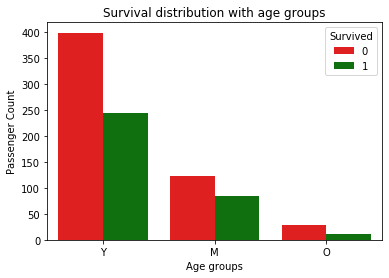

In [112]:
sns.countplot(x='Age_group',data=group_age,hue='Survived',palette=['red','green'])
plt.title('Survival distribution with age groups')
plt.xlabel('Age groups')
plt.ylabel('Passenger Count')

>Maximum people who died and survived belonged to the young age group.

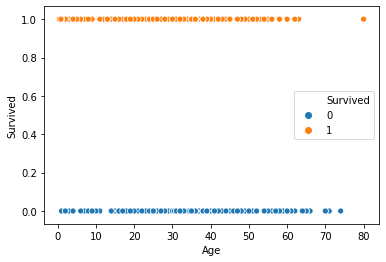

In [72]:
sns.scatterplot(data=train_data,x='Age',y='Survived',hue='Survived')

>Age doesnt seem to vary much incase of Survival and I think it should NOT be taken as a feature to build our model upon.

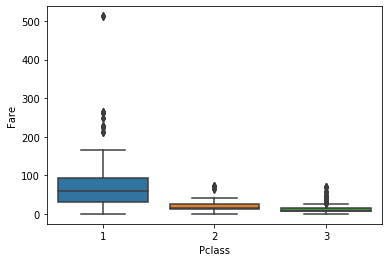

In [73]:
sns.boxplot(x='Pclass',y='Fare',data=train_data)

>This shows that as Socio economic class of a person goes from 1-3 Fare decreases. This shows that they are negatively 
co-related.

> By this visualization, following features came out to be significant to work upon:
1. Pclass
2. Fare
3. SibSp, Parch
4. Embarked
5. Sex,
Since cabin had most of values missing, I decided not to include it.